In [1]:
# for rendering Latex

import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

# Using seaborn's style
#plt.style.use('science')
#plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-dark-palette')
#plt.style.use('seaborn-deep')


width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import os
from dataclasses import dataclass

DATA_DIR = '../data'
BETA_VALUES = np.sort(
    [float(x.split('fermi_')[-1]) for x in os.listdir(DATA_DIR) if x.startswith('fermi')])
n_points = len(BETA_VALUES)


@dataclass
class Data:
    data_matrix: np.array
    energy_matrix: np.array
    dst: np.array
    time: np.array


def load_data(beta):
    data_path = os.path.join(DATA_DIR, f'fermi_{beta}')
    data_matrix = np.load(os.path.join(data_path, 'dataMatrix.npy'))
    energy_matrix = np.load(os.path.join(data_path, 'energyMatrix.npy'))
    dst = np.load(os.path.join(data_path, 'dst.npy'))
    time = np.load(os.path.join(data_path, 'time.npy'))
    return Data(data_matrix=data_matrix, energy_matrix=energy_matrix, dst=dst, time=time)

print(n_points)
print(BETA_VALUES)

30
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


(800000, 64) (300000, 64) (37500, 64)


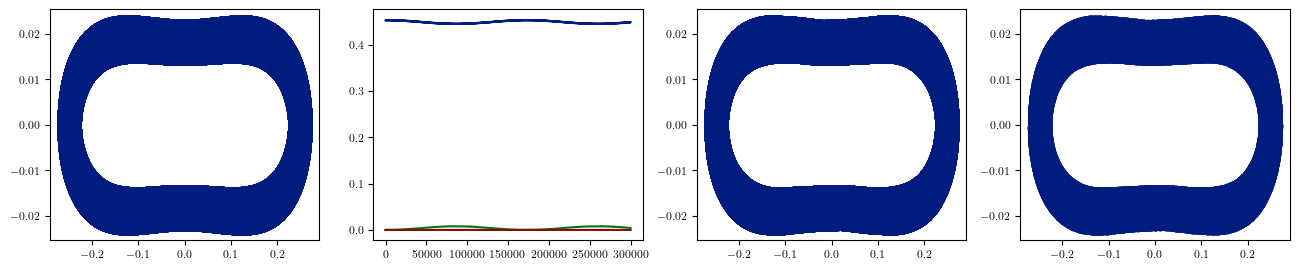

In [4]:
# LOAD DATA
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3))

data = load_data(0.1)
X = data.data_matrix
q, p = X[:, 0], X[:, 32]

n_portion = 300000

ax1.scatter(q, p)

ax2.plot(data.energy_matrix[:,0][:n_portion], linewidth=1.5, label="Mode 1") 
ax2.plot(data.energy_matrix[:,2][:n_portion], linewidth=1.5, label="Mode 1")
ax2.plot(data.energy_matrix[:,4][:n_portion], linewidth=1.5, label="Mode 1")

# take portion of data
X_portion = data.data_matrix[:n_portion]
q_portion, p_portion = X_portion[:, 0], X_portion[:, 32]

ax3.scatter(q_portion, p_portion)

# subsample data
X_subsample = X_portion[0::8]
q_subsample, p_subsample = X_subsample[:, 0], X_subsample[:, 32]

ax4.scatter(q_subsample, p_subsample)

# # sample data
# np.random.seed(1235)

# idxs = np.random.choice(X_portion.shape[0], 2000)
# X_sample = X_portion[idxs]
# q_sample, p_sample = X_sample[:, 0], X_sample[:, 32]

# ax4.scatter(q_sample, p_sample)

print(X.shape, X_portion.shape, X_subsample.shape)

In [6]:
# COMPUTE MAPPER 

import kmapper as km
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE # nonlinear

mapper = km.KeplerMapper(verbose=0)

lens = mapper.fit_transform(X_subsample,
    projection=[
        # umap.UMAP(n_components=1, random_state=1),
        TruncatedSVD(n_components=1, random_state=123),
        # TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3)
        # PCA(n_components=1)
        ]
        )

# # Define the simplicial complex
# graph = mapper.map(
#     lens,
#     X_subsample,
#     cover=km.Cover(n_cubes=13, perc_overlap=0.4),
#     clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=2, linkage='single'),
#     # clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=20),
#     # clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=123)
#     )

# # Visualization
# mapper.visualize(graph, path_html="output/fpu.html");
# plotlyviz(graph, graph_data=False)